In [16]:
import numpy as np
import shutil
import sys, os, os.path
from scipy.io import wavfile
from scipy.io.wavfile import write
import pandas as pd
import matplotlib.pyplot as plt
import csv
import librosa
import soundfile as sf
import glob
import random

### Create CSV for generated data

In [17]:
def save_csv(audio_path, output_csv):
    '''
    Create a csv file from the audio file 
    audio_path: path to the audio file
    output_csv: path to the output csv file
    '''
    # Create the output folder
    # If the folder already exists, delete it and create a new one
    if os.path.exists(output_csv):
        shutil.rmtree(output_csv)
    os.makedirs(output_csv, exist_ok=True)
    
    input_filenames = [file for file in os.listdir(audio_path) if file.endswith('.wav')]
    for name in input_filenames:
        if name[-3:] != 'wav':
            print('WARNING!! Input File format should be *.wav')
            sys.exit()

        _, data = wavfile.read(os.path.join(audio_path, name))      
        wavData = pd.DataFrame(data, columns=['M'])
        # Save in csv format
        wavData.to_csv(os.path.join(output_csv, name[:-4] + ".csv"), mode='w')

In [18]:
import os
import shutil
from scipy.io import wavfile
import pandas as pd

def save_csv_short_N(audio_path, output_csv):
    '''
    Create a csv file from the audio files up to the first iteration.
    This version specifically looks for files ending with _iter[1].wav
    audio_path: path to the audio files
    output_csv: path to the output csv folder
    '''
    # Create the output folder
    if os.path.exists(output_csv):
        shutil.rmtree(output_csv)
    os.makedirs(output_csv, exist_ok=True)

    input_filenames = [file for file in os.listdir(audio_path) if file.endswith('.wav')]
    
    # Filter files to include only those with _iter1 to _iter40
    filtered_filenames = []
    for name in input_filenames:
        parts = name.split('_iter')
        if len(parts) > 1:
            iter_part = parts[1].split('_')[0]  # This extracts the iteration number
            if iter_part.isdigit():
                iteration_number = int(iter_part)
                # Check if the iteration number is 1
                if  28 <= iteration_number <= 28:
                    filtered_filenames.append(name)
    
    for name in filtered_filenames:
        # Load and normalize the audio file
        audio, sample_rate = librosa.load(os.path.join(audio_path, name), sr=None)  # sr=None to preserve original sample rate
        
        # Create a DataFrame from normalized audio data
        wavData = pd.DataFrame(audio, columns=['M'])
        
        # Save the DataFrame to a CSV file
        csv_file_path = os.path.join(output_csv, name[:-4] + ".csv")
        wavData.to_csv(csv_file_path, index=False)

In [19]:
import os
import pandas as pd
import librosa
import shutil

def save_csv_normalized(audio_path, output_csv_dir):
    '''
    Convert all WAV files in the specified directory to CSV files in the output directory.
    Audio files are loaded and normalized to the range [-1, 1] using librosa.
    audio_path: path to the directory containing audio files
    output_csv_dir: path to the directory where CSV files will be saved
    '''
    # Ensure the output directory exists, if not, create it
    if os.path.exists(output_csv_dir):
        shutil.rmtree(output_csv_dir)
    os.makedirs(output_csv_dir, exist_ok=True)
    
    # List all WAV files in the given directory
    input_filenames = [file for file in os.listdir(audio_path) if file.endswith('.wav')]
    
    for name in input_filenames:
        # Load and normalize the audio file
        audio, sample_rate = librosa.load(os.path.join(audio_path, name), sr=None)  # sr=None to preserve original sample rate
        
        # Create a DataFrame from normalized audio data
        wavData = pd.DataFrame(audio, columns=['M'])
        
        # Save the DataFrame to a CSV file
        csv_file_path = os.path.join(output_csv_dir, name[:-4] + ".csv")
        wavData.to_csv(csv_file_path, index=False)

In [20]:
# REAL DATA  N

audio_control = '../data/control_files_short_24khz/'
csv_control = '../data/csv/csv_control_real_N/'
save_csv_normalized(audio_control, csv_control)

audio_pathological = '../data/pathological_files_short_24khz/'
csv_pathological = '../data/csv/csv_pathological_real_N/'
save_csv_normalized(audio_pathological, csv_pathological)

In [21]:
# SYNTHETIC 10MS 1 ITERATION N
"""
audio_control_generado = '../data/generados/pretrained_10ms_BigVSAN_generated_control/'
csv_control_generado = '../data/csv/csv_control_10ms_N/'
save_csv_normalized(audio_control_generado, csv_control_generado)

audio_pathological_generado = '../data/generados/pretrained_10ms_BigVSAN_generated_pathological/'
csv_pathological_generado = '../data/csv/csv_pathological_10ms_N/'
save_csv_normalized(audio_pathological_generado, csv_pathological_generado)
"""

"\naudio_control_generado = '../data/generados/pretrained_10ms_BigVSAN_generated_control/'\ncsv_control_generado = '../data/csv/csv_control_10ms_N/'\nsave_csv_normalized(audio_control_generado, csv_control_generado)\n\naudio_pathological_generado = '../data/generados/pretrained_10ms_BigVSAN_generated_pathological/'\ncsv_pathological_generado = '../data/csv/csv_pathological_10ms_N/'\nsave_csv_normalized(audio_pathological_generado, csv_pathological_generado)\n"

In [22]:
# SYNTHETIC 1 ITERATION (sacado de 40 its)

audio_control_generado = '../data/pretrained_40_1e5_BigVSAN_generated_control/'
csv_control_generado = '../data/csv/csv_control_syn_1_N/'
save_csv_short_N(audio_control_generado, csv_control_generado)

audio_pathological_generado = '../data/pretrained_40_1e5_BigVSAN_generated_pathological/'
csv_pathological_generado = '../data/csv/csv_pathological_syn_1_N/'
save_csv_short_N(audio_pathological_generado, csv_pathological_generado)

In [23]:
# SYNTHETIC 5 ITERATION (sacado de 40 its)

"""audio_control_generado = '../data/generados/pretrained_120_1e5_BigVSAN_generated_control/'
csv_control_generado = '../data/csv/csv_control_syn_5_N/'
save_csv_short_N(audio_control_generado, csv_control_generado)

audio_pathological_generado = '../data/generados/pretrained_120_1e5_BigVSAN_generated_pathological/'
csv_pathological_generado = '../data/csv/csv_pathological_syn_5_N/'
save_csv_short_N(audio_pathological_generado, csv_pathological_generado)"""

"audio_control_generado = '../data/generados/pretrained_120_1e5_BigVSAN_generated_control/'\ncsv_control_generado = '../data/csv/csv_control_syn_5_N/'\nsave_csv_short_N(audio_control_generado, csv_control_generado)\n\naudio_pathological_generado = '../data/generados/pretrained_120_1e5_BigVSAN_generated_pathological/'\ncsv_pathological_generado = '../data/csv/csv_pathological_syn_5_N/'\nsave_csv_short_N(audio_pathological_generado, csv_pathological_generado)"

In [24]:
### AUDIOS GENERADOS CON 1e-5 DE RUIDO --40 N

audio_control_generado = '../data/pretrained_40_1e5_BigVSAN_generated_control/'
csv_control_generado = '../data/csv/csv_control_generados_40_1e5_N/'
save_csv_normalized(audio_control_generado, csv_control_generado)

audio_pathological_generado = '../data/pretrained_40_1e5_BigVSAN_generated_pathological/'
csv_pathological_generado = '../data/csv/csv_pathological_generados_40_1e5_N/'
save_csv_normalized(audio_pathological_generado, csv_pathological_generado)

In [25]:
### AUDIOS GENERADOS CON 1e-6 DE RUIDO --40 N

"""audio_control_generado = '../data/generados/pretrained_40_1e6_BigVSAN_generated_control/'
csv_control_generado = '../data/csv/csv_control_generados_40_1e6_N/'
save_csv_normalized(audio_control_generado, csv_control_generado)

audio_pathological_generado = '../data/generados/pretrained_40_1e6_BigVSAN_generated_pathological/'
csv_pathological_generado = '../data/csv/csv_pathological_generados_40_1e6_N/'
save_csv_normalized(audio_pathological_generado, csv_pathological_generado)"""

"audio_control_generado = '../data/generados/pretrained_40_1e6_BigVSAN_generated_control/'\ncsv_control_generado = '../data/csv/csv_control_generados_40_1e6_N/'\nsave_csv_normalized(audio_control_generado, csv_control_generado)\n\naudio_pathological_generado = '../data/generados/pretrained_40_1e6_BigVSAN_generated_pathological/'\ncsv_pathological_generado = '../data/csv/csv_pathological_generados_40_1e6_N/'\nsave_csv_normalized(audio_pathological_generado, csv_pathological_generado)"

### Compare real VS generated

In [26]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

import librosa
import soundfile as sf


def plot_waveform(path_real, path_generado, tipo=str, ref1=str, ref2=str):
    '''
    Plot the waveform of an example of real and generated audio files using librosa.
    path_real: path to the real audio file
    path_generado: path to the generated audio file
    '''
    # Load the real audio file
    samples_1, sampling_rate_1 = librosa.load(path_real, sr=None)  # Load with the original sample rate
    time_1 = np.linspace(0, len(samples_1)/sampling_rate_1, num=len(samples_1))

    # Load the generated audio file
    samples_2, sampling_rate_2 = librosa.load(path_generado, sr=None)  # Load with the original sample rate
    time_2 = np.linspace(0, len(samples_2)/sampling_rate_2, num=len(samples_2))

    # Create subplots
    plt.figure(figsize=(10, 5))

    # Plotting the first waveform
    plt.plot(time_1, samples_1, linewidth=1)
    plt.title(f'Waveform Real {tipo}')
    plt.ylabel('Amplitude (Normalized)')
    plt.xlabel('Time (seconds)')
    plt.xlim(0, time_1.max())
    plt.tight_layout()
    plt.savefig(f'../data/waveform_{tipo}_{ref1}.png', dpi = 200)
    plt.show()

    plt.figure(figsize=(10, 5))
    # Plotting the second waveform
    plt.plot(time_2, samples_2, linewidth=1)
    plt.title(f'Waveform Generated {tipo}')
    plt.ylabel('Amplitude (Normalized)')
    plt.xlabel('Time (seconds)')
    plt.xlim(0, time_2.max())
    plt.tight_layout()
    plt.savefig(f'../data/waveform_{tipo}_{ref2}.png', dpi = 200)
    plt.show()


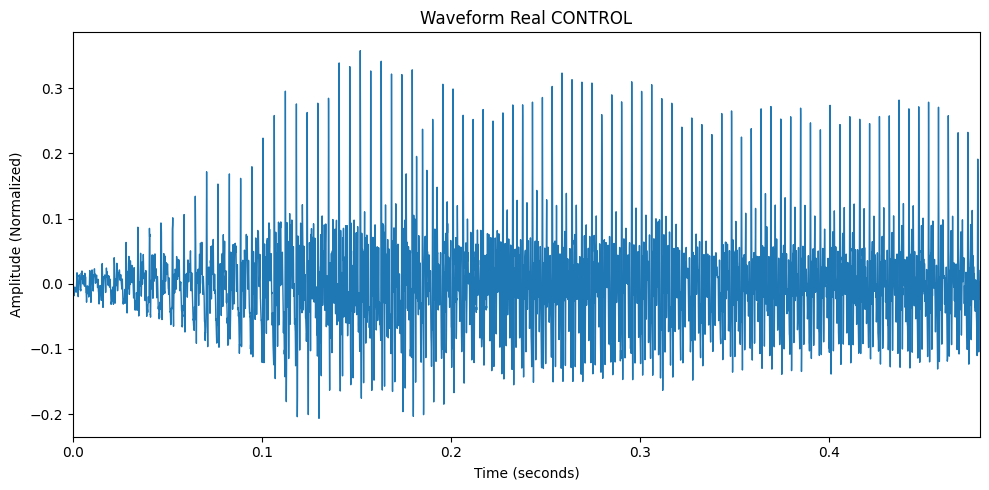

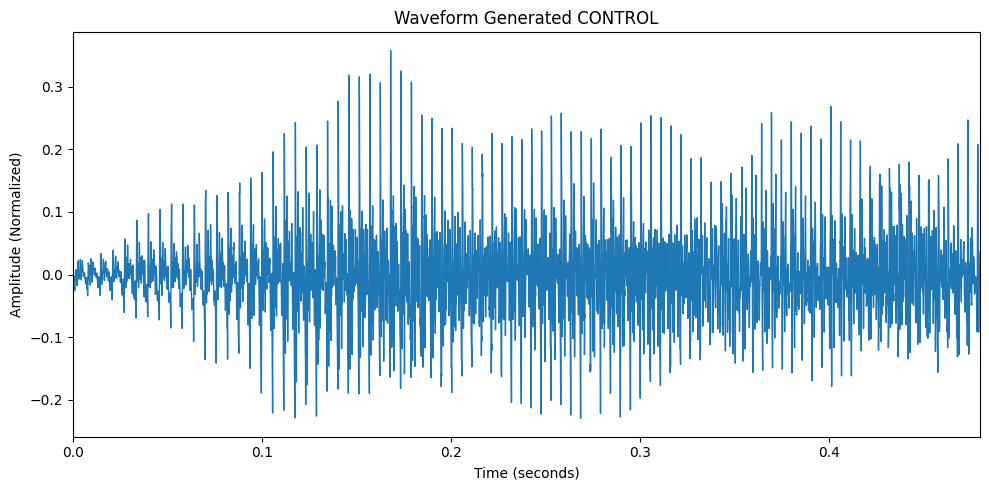

In [27]:
path_generado = '../data/pretrained_40_1e5_BigVSAN_generated_control/AVPEPUDEAC0027a1_shortened_iter1_generated.wav'
path_real = '/Users/carlos/Downloads/Neuroevolution/data/control_files_short_24khz/AVPEPUDEAC0027a1_shortened.wav'
plot_waveform(path_real, path_generado, tipo= 'CONTROL', ref1='real', ref2='generado')

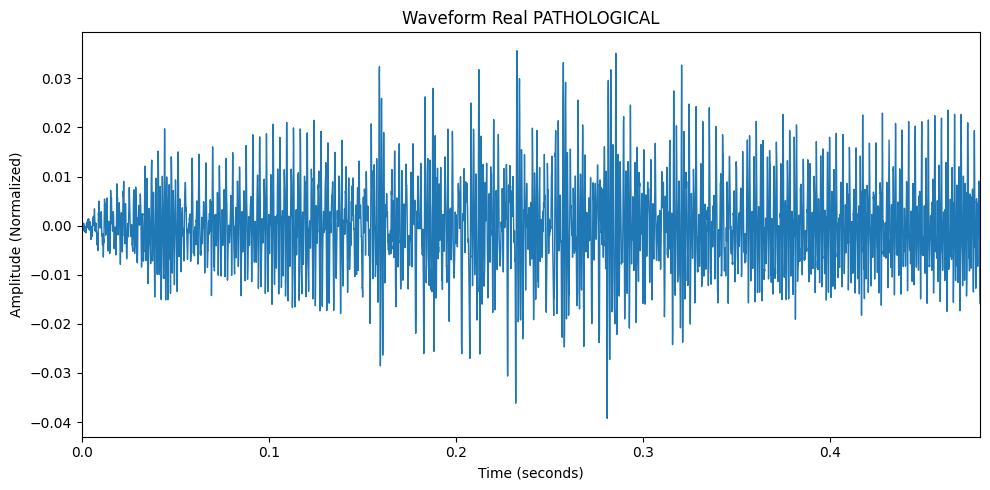

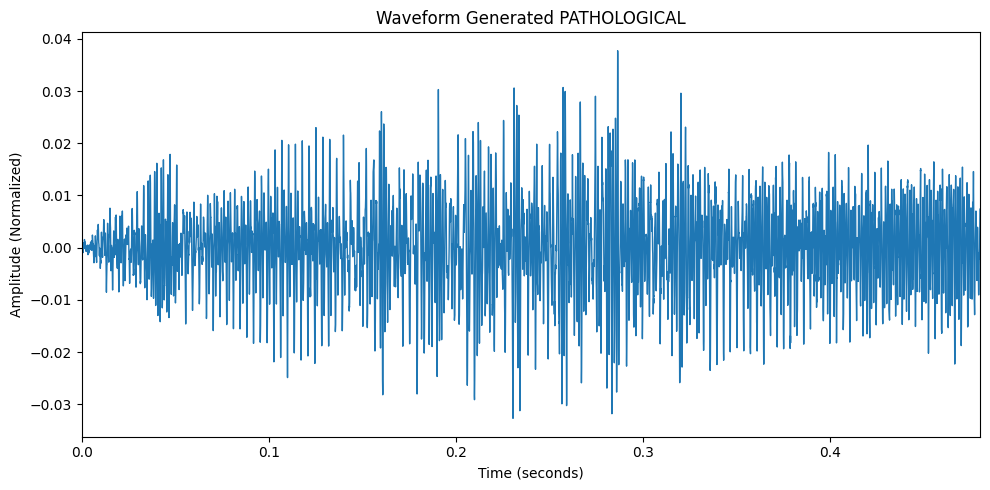

In [28]:
# Uso del ejemplo:

path_real= '../data/pathological_files_short_24khz/AVPEPUDEA0053a1_shortened.wav'
path_generado = '../data/pretrained_40_1e5_BigVSAN_generated_pathological/AVPEPUDEA0053a1_shortened_iter1_generated.wav'
plot_waveform(path_real, path_generado, tipo= 'PATHOLOGICAL', ref1='real', ref2='generado')

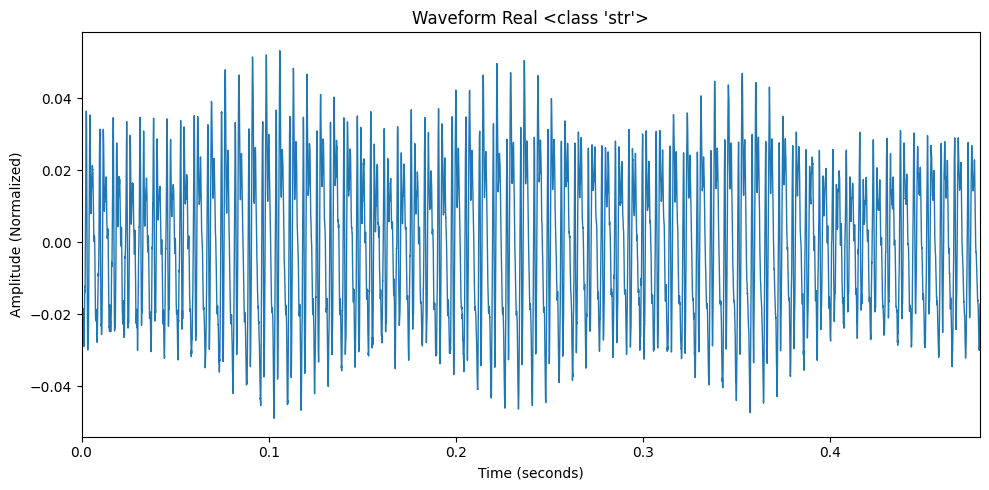

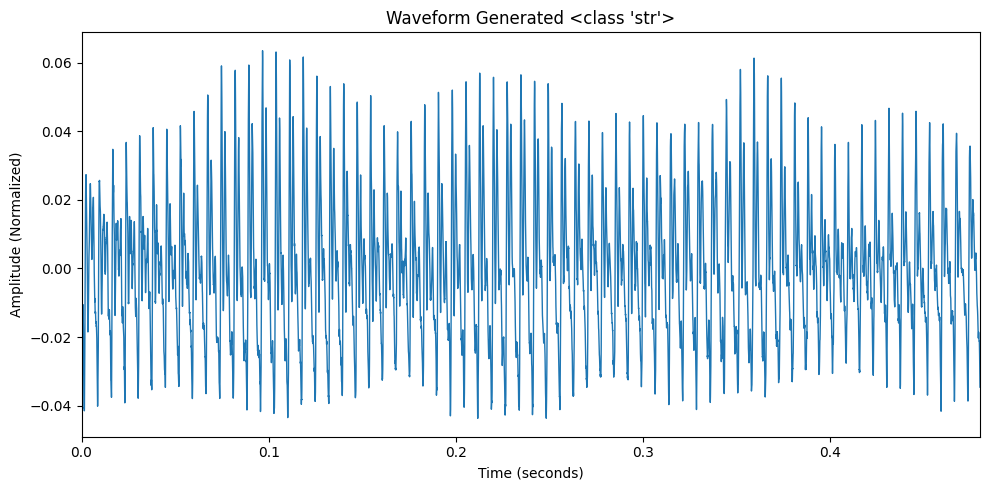

In [29]:
path_real_pathological = '../data/pathological_files_short_24khz/AVPEPUDEA0005a1_shortened.wav'
path_generado_pathological = '../data/pretrained_40_1e5_BigVSAN_generated_pathological/AVPEPUDEA0005a1_shortened_iter20_generated.wav'
plot_waveform(path_real_pathological, path_generado_pathological)

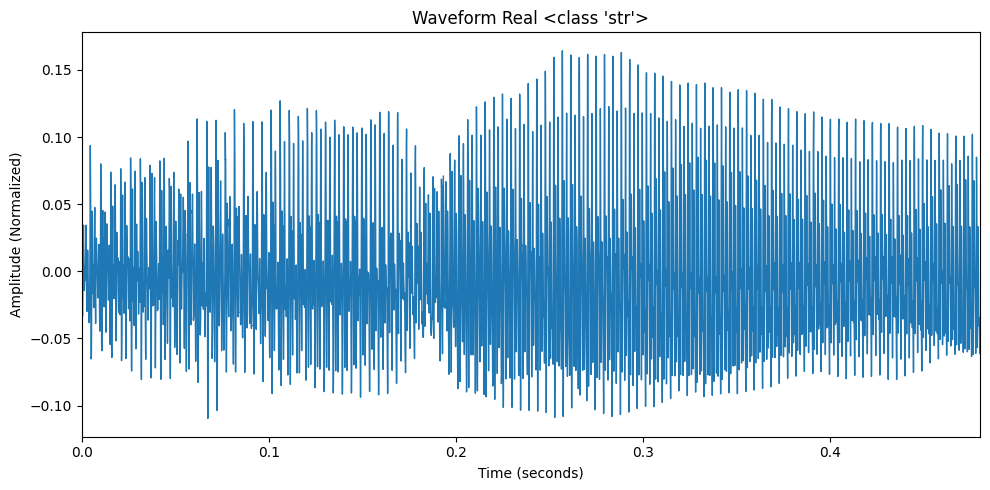

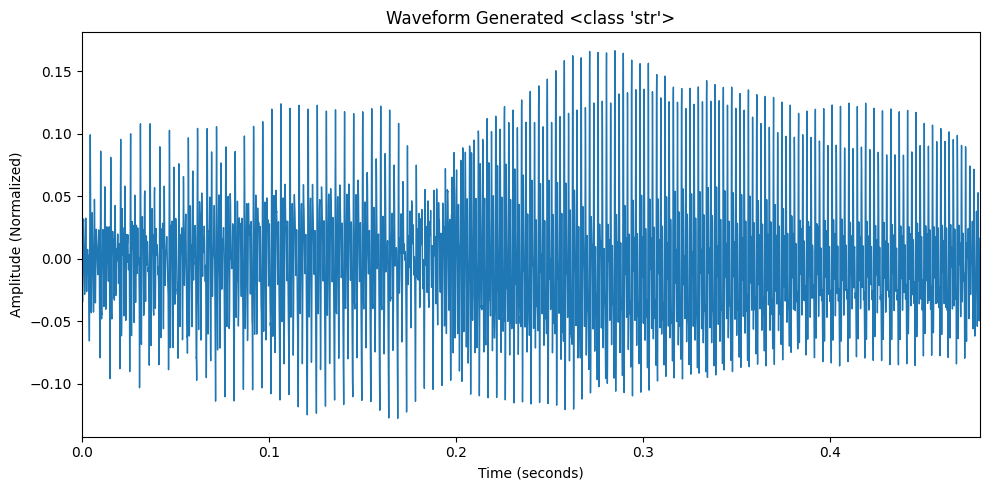

In [32]:
path_real_control_5e4 = '../data/control_files_short_24khz/AVPEPUDEAC0001a2_shortened.wav'
path_generado_control_5e4 = '../data/pretrained_40_1e5_BigVsAN_generated_control/AVPEPUDEAC0001a2_shortened_iter2_generated.wav'
plot_waveform(path_real_control_5e4, path_generado_control_5e4)

### Plots for document

In [33]:
def plot_waveform_example(path_real, tipo=str, genero=str):
    '''
    Plot the waveform of an example of real and generated audio files using librosa.
    path_real: path to the real audio file
    path_generado: path to the generated audio file
    '''
    # Load the real audio file
    samples_1, sampling_rate_1 = librosa.load(path_real, sr=None)  # Load with the original sample rate
    time_1 = np.linspace(0, len(samples_1)/sampling_rate_1, num=len(samples_1))

    plt.figure(figsize=(10, 5))
    plt.plot(time_1, samples_1, linewidth=1)
    plt.title(f'Waveform {tipo}')
    plt.ylabel('Amplitude (Normalized)')
    plt.xlabel('Time (seconds)')
    plt.xlim(0, time_1.max())
    # Show the plots
    plt.tight_layout()
    plt.savefig(f'../data/waveform_{tipo}_{genero}.png', dpi = 100)
    plt.show()


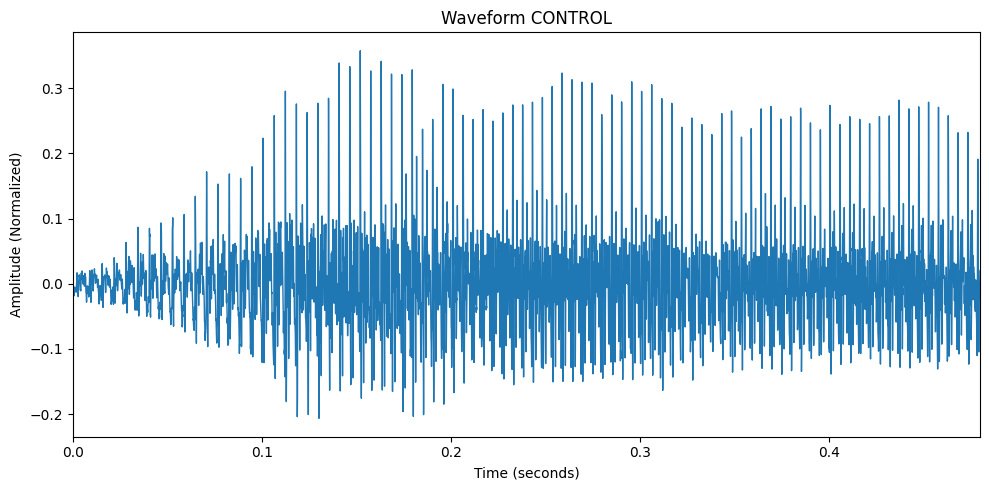

In [34]:
plot_waveform_example('../data/control_files_short_24khz/AVPEPUDEAC0027a1_shortened.wav', 'CONTROL', 'hombre')

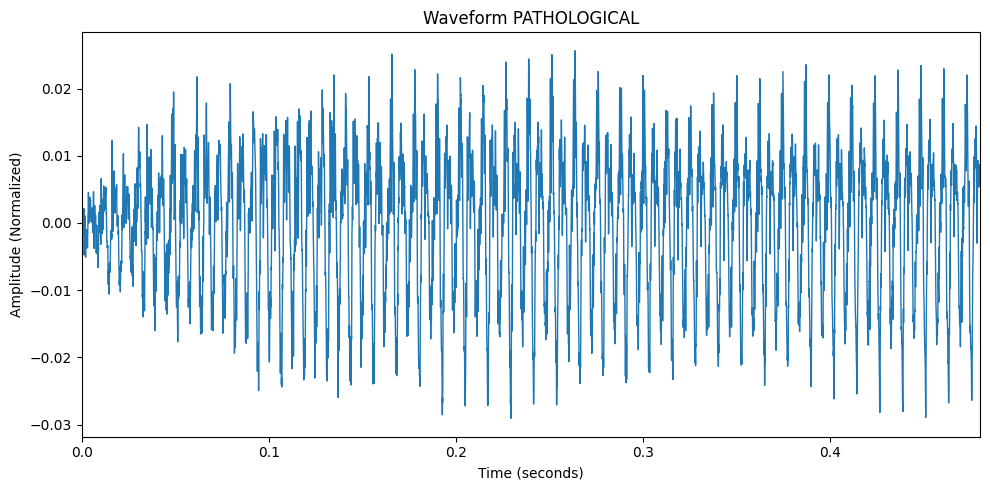

In [35]:
plot_waveform_example('../data/pathological_files_short_24khz/AVPEPUDEA0021a1_shortened.wav', 'PATHOLOGICAL', 'mujer')

### Group per patient

In [36]:
import os
import shutil
import numpy as np
import pandas as pd

def split_filename(filename):
    split_index = filename.find('a')
    if split_index != -1:
        return filename[:split_index], filename[split_index:]
    else:
        return filename, ''

def load_data_label_together(route, files_to_load=None):
    '''
    Load the data and labels from the csv files based on specific naming conventions.
    route: path to the folder containing the csv files
    files_to_load: list of files to load
    '''
    datos = []
    etiquetas = []
    files = files_to_load if files_to_load is not None else glob.glob(route + '/*.csv')
    for file_route in files:
        # Determinar la etiqueta basada en el contenido del nombre del archivo
        etiqueta = 0 if "AVPEPUDEAC" in os.path.basename(file_route) else 1
        secuencia_temporal = np.loadtxt(file_route, delimiter=',', usecols=0, skiprows=1)
        datos.append(secuencia_temporal)
        etiquetas.append(etiqueta)
    return np.array(datos), np.array(etiquetas)

def process_and_save_csvs(base_dir, control_dir, pathological_dir, output_dir):
    """
    Process and save CSV files from given directories into numpy arrays.
    """
    # Setup output directory
    npy_joined = os.path.join(base_dir, output_dir)
    if os.path.exists(npy_joined):
        shutil.rmtree(npy_joined)
    os.makedirs(npy_joined, exist_ok=True)

    # Collect all filenames and prefixes
    control_csv_generated = os.path.join(control_dir)
    pathological_csv_generated = os.path.join(pathological_dir)
    filenames = [f for f in os.listdir(control_csv_generated) if os.path.isfile(os.path.join(control_csv_generated, f))]
    filenames += [f for f in os.listdir(pathological_csv_generated) if os.path.isfile(os.path.join(pathological_csv_generated, f))]

    prefixes = set(split_filename(f)[0] for f in filenames)

    # Process each prefix
    for prefix in prefixes:
        matching_files = [f for f in filenames if f.startswith(prefix)]
        files_to_load = [os.path.join(control_csv_generated, f) if f in os.listdir(control_csv_generated) else os.path.join(pathological_csv_generated, f) for f in matching_files]
        datos, etiquetas = load_data_label_together(base_dir, files_to_load)
        np.save(os.path.join(npy_joined, f'{prefix}_X.npy'), datos)
        np.save(os.path.join(npy_joined, f'{prefix}_y.npy'), etiquetas)


In [37]:
base_dir = '../data/sets'
control_csv_generated_real = '../data/csv/csv_control_real_N/'
pathological_csv_generated_real = '../data/csv/csv_pathological_real_N/'
output_dir_real = 'test_together_N'
process_and_save_csvs(base_dir, control_csv_generated_real, pathological_csv_generated_real, output_dir_real)

In [ ]:
"""base_dir = '../data/sets'
control_csv_generated_real = '../data/csv/csv_control_10ms_N/'
pathological_csv_generated_real = '../data/csv/csv_pathological_10ms_N/'
output_dir_real = 'test_together_10ms_N'
process_and_save_csvs(base_dir, control_csv_generated_real, pathological_csv_generated_real, output_dir_real)"""

FileNotFoundError: [Errno 2] No such file or directory: '../data/csv/csv_control_10ms_N/'

In [39]:
base_dir = '../data/sets'
control_csv_generated_real = '../data/csv/csv_control_syn_1_N/'
pathological_csv_generated_real = '../data/csv/csv_pathological_syn_1_N/'
output_dir_real = 'test_together_syn_1_N'
process_and_save_csvs(base_dir, control_csv_generated_real, pathological_csv_generated_real, output_dir_real)

In [40]:
base_dir = '../data/sets'
control_csv_generated_40_1e5 = '../data/csv/csv_control_generados_40_1e5_N/'
pathological_csv_generated_40_1e5 = '../data/csv/csv_pathological_generados_40_1e5_N/'
output_dir_40_1e5 = 'generated_together_train_40_1e5_N'
process_and_save_csvs(base_dir, control_csv_generated_40_1e5, pathological_csv_generated_40_1e5, output_dir_40_1e5)

In [43]:
"""base_dir = '../data/sets'
control_csv_generated_40_1e6 = '../data/csv/csv_control_generados_40_1e6_N/'
pathological_csv_generated_40_1e6 = '../data/csv/csv_pathological_generados_40_1e6_N/'
output_dir_40_1e6 = 'generated_together_train_40_1e6_N'
process_and_save_csvs(base_dir, control_csv_generated_40_1e6, pathological_csv_generated_40_1e6, output_dir_40_1e6)"""

"base_dir = '../data/sets'\ncontrol_csv_generated_40_1e6 = '../data/csv/csv_control_generados_40_1e6_N/'\npathological_csv_generated_40_1e6 = '../data/csv/csv_pathological_generados_40_1e6_N/'\noutput_dir_40_1e6 = 'generated_together_train_40_1e6_N'\nprocess_and_save_csvs(base_dir, control_csv_generated_40_1e6, pathological_csv_generated_40_1e6, output_dir_40_1e6)"

## Pruebas magnitudes

In [42]:
list_control_male = [
    'AVPEPUDEAC0003a1', 'AVPEPUDEAC0003a2', 'AVPEPUDEAC0003a3',
    'AVPEPUDEAC0005a1', 'AVPEPUDEAC0005a2', 'AVPEPUDEAC0005a3',
    'AVPEPUDEAC0021a1', 'AVPEPUDEAC0021a2', 'AVPEPUDEAC0021a3',
    'AVPEPUDEAC0022a1', 'AVPEPUDEAC0022a2', 'AVPEPUDEAC0022a3',
    'AVPEPUDEAC0026a1', 'AVPEPUDEAC0026a2', 'AVPEPUDEAC0026a3',
    'AVPEPUDEAC0027a1', 'AVPEPUDEAC0027a2', 'AVPEPUDEAC0027a3',
    'AVPEPUDEAC0031a1', 'AVPEPUDEAC0031a2', 'AVPEPUDEAC0031a3',
    'AVPEPUDEAC0033a1', 'AVPEPUDEAC0033a2', 'AVPEPUDEAC0033a3',
    'AVPEPUDEAC0034a1', 'AVPEPUDEAC0034a2', 'AVPEPUDEAC0034a3',
    'AVPEPUDEAC0035a1', 'AVPEPUDEAC0035a2', 'AVPEPUDEAC0035a3',
    'AVPEPUDEAC0037a1', 'AVPEPUDEAC0037a2', 'AVPEPUDEAC0037a3',
    'AVPEPUDEAC0039a1', 'AVPEPUDEAC0039a2', 'AVPEPUDEAC0039a3',
    'AVPEPUDEAC0040a1', 'AVPEPUDEAC0040a2', 'AVPEPUDEAC0040a3',
    'AVPEPUDEAC0041a1', 'AVPEPUDEAC0041a2', 'AVPEPUDEAC0041a3',
    'AVPEPUDEAC0042a1', 'AVPEPUDEAC0042a2', 'AVPEPUDEAC0042a3',
    'AVPEPUDEAC0043a1', 'AVPEPUDEAC0043a2', 'AVPEPUDEAC0043a3',
    'AVPEPUDEAC0044a1', 'AVPEPUDEAC0044a2', 'AVPEPUDEAC0044a3',
    'AVPEPUDEAC0045a1', 'AVPEPUDEAC0045a2', 'AVPEPUDEAC0045a3',
    'AVPEPUDEAC0046a1', 'AVPEPUDEAC0046a2', 'AVPEPUDEAC0046a3',
    'AVPEPUDEAC0047a1', 'AVPEPUDEAC0047a2', 'AVPEPUDEAC0047a3',
    'AVPEPUDEAC0048a1', 'AVPEPUDEAC0048a2', 'AVPEPUDEAC0048a3',
    'AVPEPUDEAC0049a1', 'AVPEPUDEAC0049a2', 'AVPEPUDEAC0049a3',
    'AVPEPUDEAC0050a1', 'AVPEPUDEAC0050a2', 'AVPEPUDEAC0050a3',
    'AVPEPUDEAC0051a1', 'AVPEPUDEAC0051a2', 'AVPEPUDEAC0051a3',
    'AVPEPUDEAC0052a1', 'AVPEPUDEAC0052a2', 'AVPEPUDEAC0052a3'
]

list_control_female = [
    'AVPEPUDEAC0001a1', 'AVPEPUDEAC0001a2', 'AVPEPUDEAC0001a3',
    'AVPEPUDEAC0004a1', 'AVPEPUDEAC0004a2', 'AVPEPUDEAC0004a3',
    'AVPEPUDEAC0006a1', 'AVPEPUDEAC0006a2', 'AVPEPUDEAC0006a3',
    'AVPEPUDEAC0007a1', 'AVPEPUDEAC0007a2', 'AVPEPUDEAC0007a3',
    'AVPEPUDEAC0008a1', 'AVPEPUDEAC0008a2', 'AVPEPUDEAC0008a3',
    'AVPEPUDEAC0010a1', 'AVPEPUDEAC0010a2', 'AVPEPUDEAC0010a3',
    'AVPEPUDEAC0011a1', 'AVPEPUDEAC0011a2', 'AVPEPUDEAC0011a3',
    'AVPEPUDEAC0012a1', 'AVPEPUDEAC0012a2', 'AVPEPUDEAC0012a3',
    'AVPEPUDEAC0013a1', 'AVPEPUDEAC0013a2', 'AVPEPUDEAC0013a3',
    'AVPEPUDEAC0014a1', 'AVPEPUDEAC0014a2', 'AVPEPUDEAC0014a3',
    'AVPEPUDEAC0015a1', 'AVPEPUDEAC0015a2', 'AVPEPUDEAC0015a3',
    'AVPEPUDEAC0016a1', 'AVPEPUDEAC0016a2', 'AVPEPUDEAC0016a3',
    'AVPEPUDEAC0017a1', 'AVPEPUDEAC0017a2', 'AVPEPUDEAC0017a3',
    'AVPEPUDEAC0018a1', 'AVPEPUDEAC0018a2', 'AVPEPUDEAC0018a3',
    'AVPEPUDEAC0019a1', 'AVPEPUDEAC0019a2', 'AVPEPUDEAC0019a3',
    'AVPEPUDEAC0020a1', 'AVPEPUDEAC0020a2', 'AVPEPUDEAC0020a3',
    'AVPEPUDEAC0023a1', 'AVPEPUDEAC0023a2', 'AVPEPUDEAC0023a3',
    'AVPEPUDEAC0024a1', 'AVPEPUDEAC0024a2', 'AVPEPUDEAC0024a3',
    'AVPEPUDEAC0025a1', 'AVPEPUDEAC0025a2', 'AVPEPUDEAC0025a3',
    'AVPEPUDEAC0028a1', 'AVPEPUDEAC0028a2', 'AVPEPUDEAC0028a3',
    'AVPEPUDEAC0029a1', 'AVPEPUDEAC0029a2', 'AVPEPUDEAC0029a3',
    'AVPEPUDEAC0030a1', 'AVPEPUDEAC0030a2', 'AVPEPUDEAC0030a3',
    'AVPEPUDEAC0053a1', 'AVPEPUDEAC0053a2', 'AVPEPUDEAC0053a3',
    'AVPEPUDEAC0054a1', 'AVPEPUDEAC0054a2', 'AVPEPUDEAC0054a3',
    'AVPEPUDEAC0057a1', 'AVPEPUDEAC0057a2', 'AVPEPUDEAC0057a3'
]

list_parkinson_male = [
    'AVPEPUDEA0001a1', 'AVPEPUDEA0001a2', 'AVPEPUDEA0001a3',
    'AVPEPUDEA0005a1', 'AVPEPUDEA0005a2', 'AVPEPUDEA0005a3',
    'AVPEPUDEA0013a1', 'AVPEPUDEA0013a2', 'AVPEPUDEA0013a3',
    'AVPEPUDEA0016a1', 'AVPEPUDEA0016a2', 'AVPEPUDEA0016a3',
    'AVPEPUDEA0017a1', 'AVPEPUDEA0017a2', 'AVPEPUDEA0017a3',
    'AVPEPUDEA0022a1', 'AVPEPUDEA0022a2', 'AVPEPUDEA0022a3',
    'AVPEPUDEA0023a1', 'AVPEPUDEA0023a2', 'AVPEPUDEA0023a3',
    'AVPEPUDEA0024a1', 'AVPEPUDEA0024a2', 'AVPEPUDEA0024a3',
    'AVPEPUDEA0025a1', 'AVPEPUDEA0025a2', 'AVPEPUDEA0025a3',
    'AVPEPUDEA0027a1', 'AVPEPUDEA0027a2', 'AVPEPUDEA0027a3',
    'AVPEPUDEA0030a1', 'AVPEPUDEA0030a2', 'AVPEPUDEA0030a3',
    'AVPEPUDEA0032a1', 'AVPEPUDEA0032a2', 'AVPEPUDEA0032a3',
    'AVPEPUDEA0034a1', 'AVPEPUDEA0034a2', 'AVPEPUDEA0034a3',
    'AVPEPUDEA0037a1', 'AVPEPUDEA0037a2', 'AVPEPUDEA0037a3',
    'AVPEPUDEA0038a1', 'AVPEPUDEA0038a2', 'AVPEPUDEA0038a3',
    'AVPEPUDEA0039a1', 'AVPEPUDEA0039a2', 'AVPEPUDEA0039a3',
    'AVPEPUDEA0041a1', 'AVPEPUDEA0041a2', 'AVPEPUDEA0041a3',
    'AVPEPUDEA0043a1', 'AVPEPUDEA0043a2', 'AVPEPUDEA0043a3',
    'AVPEPUDEA0046a1', 'AVPEPUDEA0046a2', 'AVPEPUDEA0046a3',
    'AVPEPUDEA0049a1', 'AVPEPUDEA0049a2', 'AVPEPUDEA0049a3',
    'AVPEPUDEA0053a1', 'AVPEPUDEA0053a2', 'AVPEPUDEA0053a3',
    'AVPEPUDEA0055a1', 'AVPEPUDEA0055a2', 'AVPEPUDEA0055a3',
    'AVPEPUDEA0056a1', 'AVPEPUDEA0056a2', 'AVPEPUDEA0056a3',
    'AVPEPUDEA0057a1', 'AVPEPUDEA0057a2', 'AVPEPUDEA0057a3',
    'AVPEPUDEA0058a1', 'AVPEPUDEA0058a2', 'AVPEPUDEA0058a3'
]

list_parkinson_female = [
    'AVPEPUDEA0002a1', 'AVPEPUDEA0002a2', 'AVPEPUDEA0002a3',
    'AVPEPUDEA0003a1', 'AVPEPUDEA0003a2', 'AVPEPUDEA0003a3',
    'AVPEPUDEA0006a1', 'AVPEPUDEA0006a2', 'AVPEPUDEA0006a3',
    'AVPEPUDEA0007a1', 'AVPEPUDEA0007a2', 'AVPEPUDEA0007a3',
    'AVPEPUDEA0008a1', 'AVPEPUDEA0008a2', 'AVPEPUDEA0008a3',
    'AVPEPUDEA0009a1', 'AVPEPUDEA0009a2', 'AVPEPUDEA0009a3',
    'AVPEPUDEA0010a1', 'AVPEPUDEA0010a2', 'AVPEPUDEA0010a3',
    'AVPEPUDEA0011a1', 'AVPEPUDEA0011a2', 'AVPEPUDEA0011a3',
    'AVPEPUDEA0014a1', 'AVPEPUDEA0014a2', 'AVPEPUDEA0014a3',
    'AVPEPUDEA0015a1', 'AVPEPUDEA0015a2', 'AVPEPUDEA0015a3',
    'AVPEPUDEA0020a1', 'AVPEPUDEA0020a2', 'AVPEPUDEA0020a3',
    'AVPEPUDEA0021a1', 'AVPEPUDEA0021a2', 'AVPEPUDEA0021a3',
    'AVPEPUDEA0026a1', 'AVPEPUDEA0026a2', 'AVPEPUDEA0026a3',
    'AVPEPUDEA0029a1', 'AVPEPUDEA0029a2', 'AVPEPUDEA0029a3',
    'AVPEPUDEA0031a1', 'AVPEPUDEA0031a2', 'AVPEPUDEA0031a3',
    'AVPEPUDEA0035a1', 'AVPEPUDEA0035a2', 'AVPEPUDEA0035a3',
    'AVPEPUDEA0042a1', 'AVPEPUDEA0042a2', 'AVPEPUDEA0042a3',
    'AVPEPUDEA0045a1', 'AVPEPUDEA0045a2', 'AVPEPUDEA0045a3',
    'AVPEPUDEA0047a1', 'AVPEPUDEA0047a2', 'AVPEPUDEA0047a3',
    'AVPEPUDEA0048a1', 'AVPEPUDEA0048a2', 'AVPEPUDEA0048a3',
    'AVPEPUDEA0050a1', 'AVPEPUDEA0050a2', 'AVPEPUDEA0050a3',
    'AVPEPUDEA0051a1', 'AVPEPUDEA0051a2', 'AVPEPUDEA0051a3',
    'AVPEPUDEA0052a1', 'AVPEPUDEA0052a2', 'AVPEPUDEA0052a3',
    'AVPEPUDEA0054a1', 'AVPEPUDEA0054a2', 'AVPEPUDEA0054a3',
    'AVPEPUDEA0059a1', 'AVPEPUDEA0059a2', 'AVPEPUDEA0059a3'
]

In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def calcular_medias_magnitud(directorio, tipo=str, nombre = str, separation=int):
    """
    Calcula la media de la magnitud de las señales en archivos CSV dentro de un directorio especificado,
    y añade la desviación estándar y un histograma de las medias.
    
    Args:
    - directorio (str): Ruta del directorio que contiene los archivos CSV.
    
    Returns:
    - DataFrame: Un pandas DataFrame con el nombre del archivo, la media de la magnitud, y la STD para cada archivo.
    - Histogram: Un histograma de las medias de magnitud.
    """
    if tipo == 'control_male':
        lista_nombres = list_control_male
    elif tipo == 'control_female':
        lista_nombres = list_control_female
    elif tipo == 'parkinson_male':
        lista_nombres = list_parkinson_male
    elif tipo == 'parkinson_female':
        lista_nombres = list_parkinson_female
    
    resultados = []
    
    # Lista para almacenar todas las medias de magnitud para el histograma
    todas_las_medias = []
    
    lista_nombres = [f'{name}_shortened.csv' for name in lista_nombres]

    for archivo in lista_nombres:
        if archivo.endswith(".csv"):
            ruta_completa = os.path.join(directorio, archivo)
            df = pd.read_csv(ruta_completa)
            media_magnitud = np.abs(df['M']).mean()
            std_magnitud = np.abs(df['M']).std()
            resultados.append((archivo, media_magnitud, std_magnitud))
            todas_las_medias.append(media_magnitud)
    
    # Convertir los resultados en un DataFrame para una mejor visualización
    df_resultados = pd.DataFrame(resultados, columns=['Archivo', 'Media_de_Magnitud', 'STD_de_Magnitud'])
    
    # Crear un histograma de las medias de magnitud
    plt.figure(figsize=(8, 6))
    plt.hist(todas_las_medias, bins=50, color='#6495ED', edgecolor='black')
    plt.title(f'Histogram of Amplitude  {nombre}')
    plt.xlabel('Amplitude Mean')
    plt.ylabel('Frequency of Ocurrence')
    plt.xticks(np.arange(0, max(todas_las_medias)+separation, separation))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'../data/histogram_{tipo}.png', dpi=100)
    plt.show()
    
    return df_resultados



In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calcular_medias_magnitud(directorio_HC, directorio_PD, tipo=str, nombre=str, separation=int):
    """
    Calcula la media de la magnitud de las señales en archivos CSV dentro de dos directorios especificados,
    y añade la desviación estándar y un boxplot de las medias.
    
    Args:
    - directorio_HC (str): Ruta del directorio que contiene los archivos CSV para HC.
    - directorio_PD (str): Ruta del directorio que contiene los archivos CSV para PD.
    
    Returns:
    - DataFrame: Un pandas DataFrame con el nombre del archivo, la media de la magnitud, y la STD para cada archivo.
    - Boxplot: Un boxplot de las medias de magnitud.
    """
    if tipo == 'male':
        lista_nombres_HC = list_control_male
        lista_nombres_PD = list_parkinson_male
    elif tipo == 'female':
        lista_nombres_HC = list_control_female
        lista_nombres_PD = list_parkinson_female

    resultados = []
    
    # Listas para almacenar todas las medias de magnitud para los boxplots
    todas_las_medias_HC = []
    todas_las_medias_PD = []
    
    lista_nombres_HC = [f'{name}_shortened.csv' for name in lista_nombres_HC]
    lista_nombres_PD = [f'{name}_shortened.csv' for name in lista_nombres_PD]

    for archivo in lista_nombres_HC:
        if archivo.endswith(".csv"):
            ruta_completa = os.path.join(directorio_HC, archivo)
            df = pd.read_csv(ruta_completa)
            media_magnitud = np.abs(df['M']).mean()
            std_magnitud = np.abs(df['M']).std()
            resultados.append((archivo, media_magnitud, std_magnitud))
            todas_las_medias_HC.append(media_magnitud)

    for archivo in lista_nombres_PD:
        if archivo.endswith(".csv"):
            ruta_completa = os.path.join(directorio_PD, archivo)
            df = pd.read_csv(ruta_completa)
            media_magnitud = np.abs(df['M']).mean()
            std_magnitud = np.abs(df['M']).std()
            resultados.append((archivo, media_magnitud, std_magnitud))
            todas_las_medias_PD.append(media_magnitud)
    
    # Convertir los resultados en un DataFrame para una mejor visualización
    df_resultados = pd.DataFrame(resultados, columns=['Archivo', 'Media_de_Magnitud', 'STD_de_Magnitud'])
    
    
    # Crear un único boxplot con dos cajas
    fig, ax = plt.subplots(figsize=(6, 6))
    data = [todas_las_medias_HC, todas_las_medias_PD]
    
    box_colors = [(0.8, 0.847, 0.871), (0.898, 0.867, 0.941)]
    
    boxplot = ax.boxplot(data, patch_artist=True, widths=0.5, whis=1.5, autorange=False)
    
    # Asignar colores específicos a cada caja
    for patch, color in zip(boxplot['boxes'], box_colors):
        patch.set_facecolor(color)
    
    medias = []
    colors = ['lightblue', 'purple']
    linecolors = ['green', 'indigo']
    # Añadir un cuadrado verde para la media
    for i, (d, col, lc) in enumerate(zip(data, colors, linecolors), start=1):
        mean = np.mean(d)
        medias.append(mean)
        ax.plot(i, mean, marker='s',markeredgecolor=lc, markerfacecolor=col, markersize=8)
    
    ax.set_xticklabels(['HC', 'PD'])
    ax.set_ylabel('Amplitude Distribution')

    hc_legend = plt.Line2D([0], [0], marker='s', color='w', label=f'HC Mean: {medias[0]:.2f}', markerfacecolor='lightblue', markersize=8)
    pd_legend = plt.Line2D([0], [0], marker='s', color='w', label=f'PD Mean: {medias[1]:.2f}', markerfacecolor='purple', markersize=8)
    plt.legend(handles=[hc_legend, pd_legend], loc='upper right')
    
    plt.tight_layout()
    #plt.grid()
    plt.savefig(f'../data/boxplot_{tipo}.png', dpi=200)
    plt.show()
    
    return df_resultados


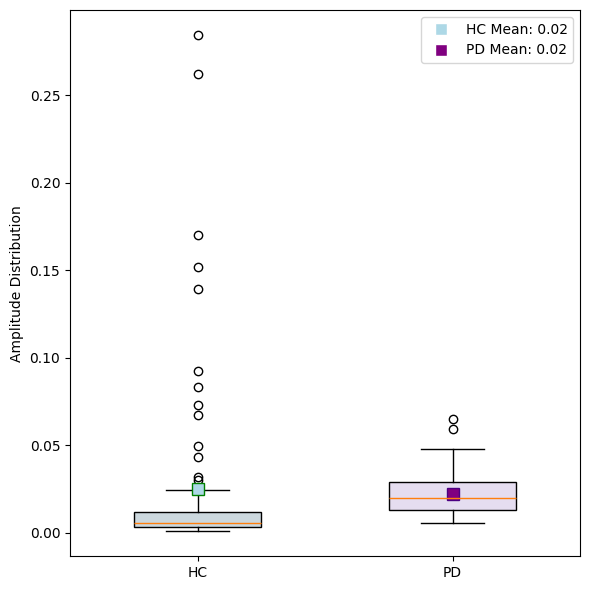

In [47]:
df_medias_magnitud_M  = calcular_medias_magnitud('../data/csv/csv_control_real_N', '../data/csv/csv_pathological_real_N', tipo='male', nombre='Control Male vs Parkinson Male', separation=50)

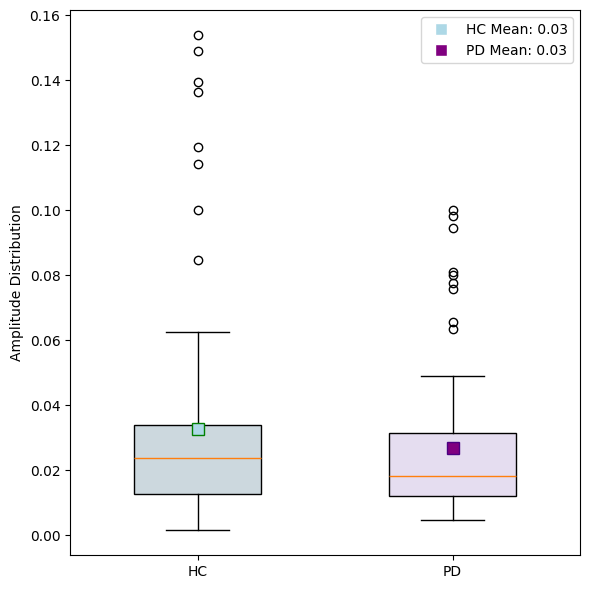

In [48]:
df_medias_magnitud_F = calcular_medias_magnitud('../data/csv/csv_control_real_N', '../data/csv/csv_pathological_real_N', tipo='female', nombre='Control Female vs Parkinson Female', separation=50)

In [50]:
media_final_C_M = np.abs(df_medias_magnitud_M['Media_de_Magnitud']).mean()
std_final_C_M = np.abs(df_medias_magnitud_M['STD_de_Magnitud']).std()
media_final_C_F = np.abs(df_medias_magnitud_F['Media_de_Magnitud']).mean()
std_final_C_F = np.abs(df_medias_magnitud_F['STD_de_Magnitud']).std()



print(media_final_C_M, '+-', std_final_C_M)
print(media_final_C_F, '+-', std_final_C_F)



0.02352809132437893 +- 0.030312486924580512
0.02969031736554573 +- 0.024916661047797047


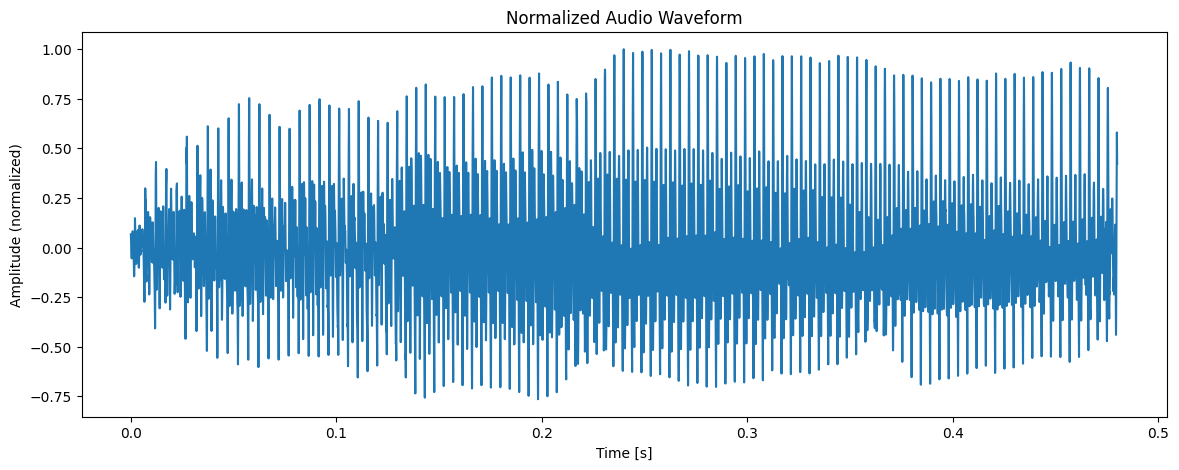

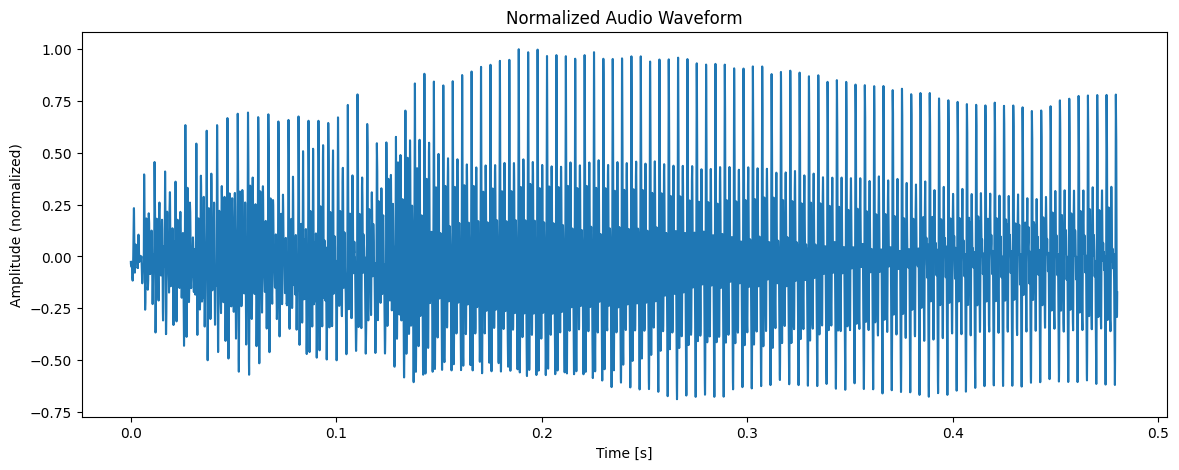

In [54]:
import os
import wave 
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def read_csv(csv_file_path, sample_rate):
    '''
    Read audio data from a CSV file and normalize it.
    csv_file_path: Path to the CSV file containing audio amplitude data.
    sample_rate: The sample rate of the audio data used for time axis calculation.
    This function supports CSVs with column 'Amplitude' or 'M' (fallback).
    '''
    # Load data from CSV
    df = pd.read_csv(csv_file_path)
    # Accept either 'Amplitude' (older/other format) or 'M' (current generated CSVs)
    if 'Amplitude' in df.columns:
        audio_data = df['Amplitude'].values
    elif 'M' in df.columns:
        audio_data = df['M'].values
    else:
        raise KeyError(f"Expected column 'Amplitude' or 'M' in CSV: {csv_file_path}. Found columns: {list(df.columns)}")
    
    # Normalize the audio data (avoid division by zero)
    max_value = np.max(np.abs(audio_data))
    if max_value > 0:
        audio_data_normalized = audio_data / max_value
    else:
        audio_data_normalized = audio_data.astype(float)
    
    # Calculate the time axis for the waveform
    time_axis = np.linspace(0, len(audio_data_normalized) / sample_rate, num=len(audio_data_normalized))
    
    return audio_data_normalized, time_axis

def read_and_normalize_csv(csv_file_path, sample_rate):
    '''
    Read audio data from a CSV file and normalize it.
    csv_file_path: Path to the CSV file containing audio amplitude data.
    sample_rate: The sample rate of the audio data used for time axis calculation.
    '''
    # Load data from CSV
    df = pd.read_csv(csv_file_path)
    audio_data = df['M'].values
    
    # Normalize the audio data
    max_value = np.max(np.abs(audio_data))  # Find the max absolute value for normalization
    if max_value > 0:
        audio_data_normalized = audio_data / max_value
    else:
        audio_data_normalized = audio_data.astype(float)
    
    # Calculate the time axis for the waveform
    time_axis = np.linspace(0, len(audio_data_normalized) / sample_rate, num=len(audio_data_normalized))
    
    return audio_data_normalized, time_axis

# Example usage:
csv_file_path = '../data/csv/csv_control_generados_40_1e5_N/AVPEPUDEAC0001a1_shortened_iter3_generated.csv'
sample_rate = 24000  # This needs to be known or assumed
audio_data_normalized, time_axis = read_and_normalize_csv(csv_file_path, sample_rate)

# Plot the normalized audio waveform
plt.figure(figsize=(14, 5))
plt.plot(time_axis, audio_data_normalized)
plt.title('Normalized Audio Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude (normalized)')
plt.show()

csv_file_path = '../data/csv/csv_control_real_N/AVPEPUDEAC0001a1_shortened.csv'
sample_rate = 24000  # This needs to be known or assumed
audio_data_normalized, time_axis = read_csv(csv_file_path, sample_rate)

# Plot the normalized audio waveform
plt.figure(figsize=(14, 5))
plt.plot(time_axis, audio_data_normalized)
plt.title('Normalized Audio Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude (normalized)')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def load_data(route, files_to_load=None):
    '''
    Load the data and labels from the csv files
    route: path to the folder containing the csv files
    etiqueta: label for the data
    files_to_load: list of files to load
    '''
    datos = []
    # Utiliza los archivos especificados si se proporciona una lista, de lo contrario, carga todos los archivos en la ruta
    files = files_to_load if files_to_load is not None else glob.glob(route + '/*.csv')
    files = sorted(files)
    for file_route in files:
        # Carga solo la segunda columna (índice 1) de cada archivo
        secuencia_temporal = np.loadtxt(file_route, delimiter=',', usecols=1, skiprows=1)
        datos.append(secuencia_temporal)
    return np.array(datos)


def normalize_minmax(series_set):
    scaler = MinMaxScaler((-1, 1))
    series_set_scaled = np.zeros_like(series_set)  # Crear un arreglo del mismo tamaño que series_set
    for i, series in enumerate(series_set):
        # Reshape de (n_features,) a (n_features, 1) para el scaler
        series_reshaped = series.reshape(-1, 1)
        scaler.fit(series_reshaped)
        series_set_scaled[i] = scaler.transform(series_reshaped).flatten()  # Aplanar de nuevo a (n_features,)
    return series_set_scaled

def normalize_standard(series_set):
    scaler = StandardScaler()
    series_set_scaled = np.zeros_like(series_set)  # Crear un arreglo del mismo tamaño que series_set
    for i, series in enumerate(series_set):
        # Reshape de (n_features,) a (n_features, 1) para el scaler
        series_reshaped = series.reshape(-1, 1)
        scaler.fit(series_reshaped)
        series_set_scaled[i] = scaler.transform(series_reshaped).flatten()  # Aplanar de nuevo a (n_features,)
    return series_set_scaled

def normalize_minmax_global(series_set):
    scaler = MinMaxScaler((-1, 1))
    series_set_scaled = scaler.fit_transform(series_set)  # Aplanar de nuevo a (n_features,)
    return series_set_scaled

def normalize_standard_global(series_set):
    scaler = StandardScaler()
    series_set_scaled = scaler.fit_transform(series_set)  # Aplanar de nuevo a (n_features,)
    return series_set_scaled


In [ ]:
control_real = '../data/csv/csv_control_real'
control_generado ='../data/csv/csv_control_generados_seq_40'
pathological_real = '../data/csv/csv_pathological_real'
pathological_generado = '../data/csv/csv_pathological_generados_seq_40'

data_control_real = load_data(control_real)
data_control_generado = load_data(control_generado)
data_pathological_real = load_data(pathological_real)
data_pathological_generado = load_data(pathological_generado)

data_control_real_m_i = normalize_minmax(data_control_real)
data_control_generado_m_i = normalize_minmax(data_control_generado)
data_pathological_real_m_i = normalize_minmax(data_pathological_real)
data_pathological_generado_m_i = normalize_minmax(data_pathological_generado)

data_control_real_s_i = normalize_standard(data_control_real)
data_control_generado_s_i = normalize_standard(data_control_generado)
data_pathological_real_s_i = normalize_standard(data_pathological_real)
data_pathological_generado_s_i = normalize_standard(data_pathological_generado)

data_control_real_m_g = normalize_minmax_global(data_control_real)
data_control_generado_m_g = normalize_minmax_global(data_control_generado)
data_pathological_real_m_g = normalize_minmax_global(data_pathological_real)
data_pathological_generado_m_g = normalize_minmax_global(data_pathological_generado)

data_control_real_s_g = normalize_standard_global(data_control_real)
data_control_generado_s_g = normalize_standard_global(data_control_generado)
data_pathological_real_s_g = normalize_standard_global(data_pathological_real)
data_pathological_generado_s_g = normalize_standard_global(data_pathological_generado)


In [ ]:
id = 0
id2 = id+1
id3 = id2 + 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y los subplots
plt.figure(figsize=(20, 8))
plt.suptitle('CONTROL 1')

# Subplot 1
plt.subplot(3, 2, 1)
plt.plot(data_control_real_m_i[id], label="real" )
plt.plot(data_control_generado_m_i[id], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX INDIVIDUAL')
plt.xlim(0,11520)

# Subplot 2
plt.subplot(3, 2, 2)
plt.plot(data_control_real_m_g[id], label="real" )
plt.plot(data_control_generado_m_g[id], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 3)
plt.plot(data_control_real_s_i[id], label="real" )
plt.plot(data_control_generado_s_i[id], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD IND')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 4)
plt.plot(data_control_real_s_g[id], label="real" )
plt.plot(data_control_generado_s_g[id], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 5)
plt.plot(data_control_real[id], label="real" )
plt.legend(loc="best")
plt.title('REAL')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 6)
plt.plot(data_control_generado[id], label="generado" )
plt.legend(loc="best")
plt.title('GENERADO')
plt.xlim(0,11520)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#---------------------------------------

# Crear la figura y los subplots
plt.figure(figsize=(20, 8))
plt.suptitle('CONTROL 2')

# Subplot 1
plt.subplot(3, 2, 1)
plt.plot(data_control_real_m_i[id2], label="real" )
plt.plot(data_control_generado_m_i[id2], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX INDIVIDUAL')
plt.xlim(0,11520)

# Subplot 2
plt.subplot(3, 2, 2)
plt.plot(data_control_real_m_g[id2], label="real" )
plt.plot(data_control_generado_m_g[id2], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 3)
plt.plot(data_control_real_s_i[id2], label="real" )
plt.plot(data_control_generado_s_i[id2], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD IND')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 4)
plt.plot(data_control_real_s_g[id2], label="real" )
plt.plot(data_control_generado_s_g[id2], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 5)
plt.plot(data_control_real[id2], label="real" )
plt.legend(loc="best")
plt.title('REAL')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 6)
plt.plot(data_control_generado[id2], label="generado" )
plt.legend(loc="best")
plt.title('GENERADO')
plt.xlim(0,11520)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#---------------------------------------

# Crear la figura y los subplots
plt.figure(figsize=(20, 8))
plt.suptitle('CONTROL 3')
# Subplot 1
plt.subplot(3, 2, 1)
plt.plot(data_control_real_m_i[id3], label="real" )
plt.plot(data_control_generado_m_i[id3], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX INDIVIDUAL')
plt.xlim(0,11520)

# Subplot 2
plt.subplot(3, 2, 2)
plt.plot(data_control_real_m_g[id3], label="real" )
plt.plot(data_control_generado_m_g[id3], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 3)
plt.plot(data_control_real_s_i[id3], label="real" )
plt.plot(data_control_generado_s_i[id3], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD IND')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 4)
plt.plot(data_control_real_s_g[id3], label="real" )
plt.plot(data_control_generado_s_g[id3], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 5)
plt.plot(data_control_real[id3], label="real" )
plt.legend(loc="best")
plt.title('REAL')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 6)
plt.plot(data_control_generado[id3], label="generado" )
plt.legend(loc="best")
plt.title('GENERADO')
plt.xlim(0,11520)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Crear la figura y los subplots
plt.figure(figsize=(20, 8))
plt.suptitle('PATHOLOGICAL 1')

# Subplot 1
plt.subplot(3, 2, 1)
plt.plot(data_pathological_real_m_i[id], label="real" )
plt.plot(data_pathological_generado_m_i[id], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX INDIVIDUAL')
plt.xlim(0,11520)

# Subplot 2
plt.subplot(3, 2, 2)
plt.plot(data_pathological_real_m_g[id], label="real" )
plt.plot(data_pathological_generado_m_g[id], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 3)
plt.plot(data_pathological_real_s_i[id], label="real" )
plt.plot(data_pathological_generado_s_i[id], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD IND')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 4)
plt.plot(data_pathological_real_s_g[id], label="real" )
plt.plot(data_pathological_generado_s_g[id], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 5)
plt.plot(data_pathological_real[id], label="real" )
plt.legend(loc="best")
plt.title('REAL')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 6)
plt.plot(data_pathological_generado[id], label="generado" )
plt.legend(loc="best")
plt.title('GENERADO')
plt.xlim(0,11520)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#---------------------------------------

# Crear la figura y los subplots
plt.figure(figsize=(20, 8))
plt.suptitle('PATHOLOGICAL 2')

# Subplot 1
plt.subplot(3, 2, 1)
plt.plot(data_pathological_real_m_i[id2], label="real" )
plt.plot(data_pathological_generado_m_i[id2], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX INDIVIDUAL')
plt.xlim(0,11520)

# Subplot 2
plt.subplot(3, 2, 2)
plt.plot(data_pathological_real_m_g[id2], label="real" )
plt.plot(data_pathological_generado_m_g[id2], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 3)
plt.plot(data_pathological_real_s_i[id2], label="real" )
plt.plot(data_pathological_generado_s_i[id2], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD IND')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 4)
plt.plot(data_pathological_real_s_g[id2], label="real" )
plt.plot(data_pathological_generado_s_g[id2], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 5)
plt.plot(data_pathological_real[id2], label="real" )
plt.legend(loc="best")
plt.title('REAL')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 6)
plt.plot(data_pathological_generado[id2], label="generado" )
plt.legend(loc="best")
plt.title('GENERADO')
plt.xlim(0,11520)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#---------------------------------------

# Crear la figura y los subplots
plt.figure(figsize=(20, 8))
plt.suptitle('PATHOLOGICAL 3')

# Subplot 1
plt.subplot(3, 2, 1)
plt.plot(data_pathological_real_m_i[id3], label="real" )
plt.plot(data_pathological_generado_m_i[id3], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX INDIVIDUAL')
plt.xlim(0,11520)

# Subplot 2
plt.subplot(3, 2, 2)
plt.plot(data_pathological_real_m_g[id3], label="real" )
plt.plot(data_pathological_generado_m_g[id3], label="generado" )
plt.legend(loc="best")
plt.title('MIN MAX GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 3)
plt.plot(data_pathological_real_s_i[id3], label="real" )
plt.plot(data_pathological_generado_s_i[id3], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD IND')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 4)
plt.plot(data_pathological_real_s_g[id3], label="real" )
plt.plot(data_pathological_generado_s_g[id3], label="generado" )
plt.legend(loc="best")
plt.title('STANDARD GLOBAL')
plt.xlim(0,11520)

# Subplot 3
plt.subplot(3, 2, 5)
plt.plot(data_pathological_real[id3], label="real" )
plt.legend(loc="best")
plt.title('REAL')
plt.xlim(0,11520)

# Subplot 4
plt.subplot(3, 2, 6)
plt.plot(data_pathological_generado[id3], label="generado" )
plt.legend(loc="best")
plt.title('GENERADO')
plt.xlim(0,11520)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()